In [132]:
import sys
sys.path.append(r'C:\Users\Rory\extra_repos\ruairitran\package')
from utils import load_dat_data
from preprocess import get_spike_times
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import filtfilt, butter
import seaborn as sns
import matplotlib

matplotlib.rcParams.update({'font.size': 30})
sns.set_style("whitegrid")

In [133]:
cols = list(sns.color_palette(n_colors=4).as_hex())
cols

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

In [229]:
p = r'E:\CIT_WAY\dat_files\cat\2018-05-07_03\2018-05-07_03.dat'
save_dir = r'E:\figures\traces'
cluster = 19
t_start = 3 * 60
chan = 24
time_span = 5
color='#ff7f0e'

In [230]:
from scipy.signal import filtfilt, butter


def load(p, cluster):
    raw_data = load_dat_data(p)
    spikes = get_spike_times(os.path.dirname(p))
    spikes = spikes[spikes['cluster_id']==cluster]
    spike_times = spikes['spike_times']
    return spike_times, raw_data


def bpf(raw_data, fs=30000, high=3000, low=400):
    low = low /(fs/2)
    high = high / (fs/2)
    b, a = butter(N=4, Wn=(low, high), btype='pass')
    return filtfilt(b, a, raw_data, axis=-1)


def create_trace(t_start, time_span, spike_times, raw_data):
    trace_nsamps = time_span * 30000
    t_start = t_start * 30000
    t_stop = t_start + trace_nsamps
    df_trace = pd.DataFrame({'y':bpf(raw_data[t_start:t_stop, chan])})
    df_trace['Time [s]'] =  np.linspace(0, len(df_trace)/30000, len(df_trace))
    df_trace['samp'] = np.arange(t_start, t_stop)
    return df_trace


def get_relovant_spikes(samples, spike_times):
    return spike_times[spike_times.isin(samples)]


def _color_spike(df, spike, ax, color, samps=60, linewidth=4):
    i = df[df['samp']==spike].index.values[0]
    ax.plot(df.iloc[i-samps:i+samps]['Time [s]'], 
            df.iloc[i-samps:i+samps]['y'], color=color, linewidth=linewidth)
    return ax


def plot_traceview(ax, trace, time, spikes, color='blue'):
    ax.plot(time, trace, 'grey')
    for i in range(len(spikes)):
        ax = _color_spike(df=dft, spike=spikes.iloc[i], ax=ax, color=color)
    
    ax.set_xlabel('Time [s]', fontsize=30)
    ax.set_ylabel('Voltage [uV]', fontsize=30)
    return ax


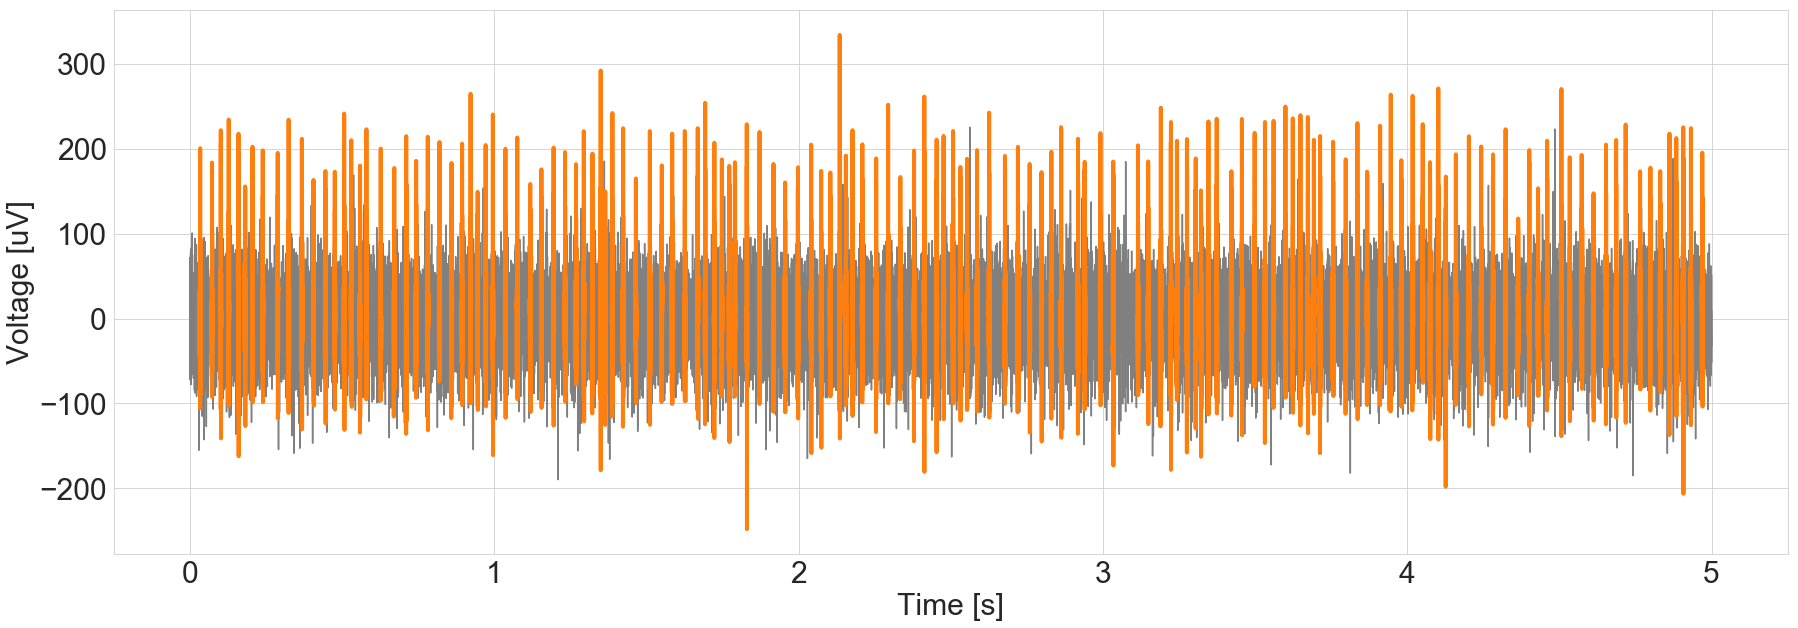

In [232]:
spike_times, raw_data = load(p, cluster)

dft = create_trace(t_start=t_start, 
                   time_span=time_span, 
                   spike_times=spike_times, 
                   raw_data=raw_data)

spike_times = get_relovant_spikes(samples=dft['samp'], 
                                  spike_times=spike_times)


f, a = plt.subplots(figsize=(30, 10))
a = plot_traceview(ax=a, trace=dft['y'], time=dft['Time [s]'], 
              spikes=spike_times, color=color)

# plt.savefig(os.path.join(save_dir, 'very_fast.png'), dpi=300)